# [ビギナー・常人] sklearnを用いて基本的な前処理を学ぶ
## 下記のサイトのデータ処理をここで行う
https://data-flair.training/blogs/python-ml-data-preprocessing/

## Jupyter Notebookの魔法のコマンド

In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container{width:80%!important;}</style>'))

## UCIのWineデータをロード

In [2]:
%matplotlib inline
import pandas, scipy, numpy
# Setting precision for the output
numpy.set_printoptions(precision=3)

df = pandas.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
# 行・列のlabel以外を取得
array = df.values
# Separating data into input and output components
x = array[:, 0:8]
y = array[:, 8]

## Scalling Data

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(x)
display(rescaledX[:5,:])

array([[0.248, 0.397, 0.   , 0.068, 0.107, 0.141, 0.099, 0.568],
       [0.283, 0.521, 0.   , 0.116, 0.144, 0.338, 0.216, 0.494],
       [0.283, 0.438, 0.04 , 0.096, 0.134, 0.197, 0.17 , 0.509],
       [0.584, 0.11 , 0.56 , 0.068, 0.105, 0.225, 0.191, 0.582],
       [0.248, 0.397, 0.   , 0.068, 0.107, 0.141, 0.099, 0.568]])

## Standardizing Data

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
rescaledX = scaler.transform(x)
display(rescaledX.mean(axis=0))
display(rescaledX.std(axis=0))
display(rescaledX[0:5,:])

array([ 3.555e-16,  1.733e-16, -8.887e-17, -1.244e-16,  3.910e-16,
       -6.221e-17,  4.444e-17,  2.364e-14])

array([1., 1., 1., 1., 1., 1., 1., 1.])

array([[-0.528,  0.962, -1.391, -0.453, -0.244, -0.466, -0.379,  0.558],
       [-0.299,  1.967, -1.391,  0.043,  0.224,  0.873,  0.624,  0.028],
       [-0.299,  1.297, -1.186, -0.169,  0.096, -0.084,  0.229,  0.134],
       [ 1.655, -1.384,  1.484, -0.453, -0.265,  0.108,  0.412,  0.664],
       [-0.528,  0.962, -1.391, -0.453, -0.244, -0.466, -0.379,  0.558]])

## Normalizing Data

In [5]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(x)
rescaledX = scaler.transform(x)
display(rescaledX[0:5,:])

array([[2.024e-01, 1.914e-02, 0.000e+00, 5.196e-02, 2.079e-03, 3.008e-01,
        9.299e-01, 2.729e-02],
       [1.083e-01, 1.222e-02, 0.000e+00, 3.611e-02, 1.361e-03, 3.472e-01,
        9.306e-01, 1.385e-02],
       [1.377e-01, 1.342e-02, 7.061e-04, 4.060e-02, 1.624e-03, 2.648e-01,
        9.533e-01, 1.760e-02],
       [1.767e-01, 4.416e-03, 8.833e-03, 2.997e-02, 1.183e-03, 2.681e-01,
        9.464e-01, 1.574e-02],
       [2.024e-01, 1.914e-02, 0.000e+00, 5.196e-02, 2.079e-03, 3.008e-01,
        9.299e-01, 2.729e-02]])

## Binarizing Data

In [6]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.0).fit(x)
binaryX = binarizer.transform(x)
display(binaryX[0:5,:])

array([[1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 1., 1.]])

## Mean Removal（StandardScalerと機能は同じ）
標準化と同じ

In [7]:
from sklearn.preprocessing import scale
data_standardized = scale(df)
print('列の平均が0, 分散1になっていることが分かる')
display(data_standardized.mean(axis=0))
display(data_standardized.std(axis=0))
display(df.head())

列の平均が0, 分散1になっていることが分かる


c:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  


array([ 3.555e-16,  1.733e-16, -8.887e-17, -1.244e-16,  3.910e-16,
       -6.221e-17,  4.444e-17,  2.364e-14,  2.862e-15,  6.754e-16,
        1.066e-16,  8.887e-17])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## One Hot Encoding
詳しい動作はこちらで確認したhttps://github.com/furukawa-laboratory/workout_report_2019/blob/master/trainer/hatano/preprocessing.ipynb

In [8]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder.fit([[0, 1, 6, 2],
             [1, 5, 3, 5],
             [2, 8, 2, 7],
             [1, 0, 4, 2]])
display(encoder.transform([[2,1,1,1]]).toarray())

c:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

sklearn公式のサンプルコードでもOneHotEncoderの挙動を確認した https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X = [['Male', 1], 
     ['Female', 3],
     ['Female', 2]]
enc.fit(X)
print(enc.categories_)
enc.transform([['Female', 1],
               ['Male', 4]]).toarray()

[array(['Female', 'Male'], dtype=object), array([1, 2, 3], dtype=object)]


array([[1., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.]])

# Label Encoding
カテゴリのラベルを数値に変換する

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
input_classes = ['Havells','Philips','Syska','Eveready','Lloyd']
label_encoder.fit(input_classes)
for i,item in enumerate(label_encoder.classes_):
    print(item, '-->', i)
labels = ['Lloyd', 'Syska', 'Philips']
print('カテゴリラベルを数値に変換')
display(label_encoder.transform(labels))
print('数値をカテゴリラベルに再変換')
display(label_encoder.inverse_transform(label_encoder.transform(labels)))

Eveready --> 0
Havells --> 1
Lloyd --> 2
Philips --> 3
Syska --> 4
カテゴリラベルを数値に変換


array([2, 4, 3], dtype=int64)

数値をカテゴリラベルに再変換


array(['Lloyd', 'Syska', 'Philips'], dtype='<U8')

## df.describe()
DataFrameの各列がもつ行数や平均、MAX値などを簡単に表示できるメソッド

In [11]:
display(df.describe())
display(df.shape)
display(df.head(10))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


(1599, 12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


## df.groupby()
指定した列の同じ値をまとめて、その塊で同じ操作をしたい場合に使用する

In [12]:
display(df.groupby('quality'))
print('各値の塊の個数を表示')
display(df.groupby('quality').size())
print('quolityの値で塊を作り、そのときの各列の平均値も見ることができる')
display(df.groupby('quality').mean())
print('複数の列でも可能')
display(df.groupby(['quality','pH']).mean().head())

各値の塊の個数を表示


quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

quolityの値で塊を作り、そのときの各列の平均値も見ることができる


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


複数の列でも可能


fixed acidity  volatile acidity  citric acid  residual sugar  \
quality pH                                                                   
3       3.16           10.4             0.610         0.49             2.1   
        3.25           11.6             0.580         0.66             2.2   
        3.31            7.3             0.980         0.05             2.1   
        3.32            6.8             0.815         0.00             1.2   
        3.38           10.4             0.440         0.42             1.5   

              chlorides  free sulfur dioxide  total sulfur dioxide  density  \
quality pH                                                                    
3       3.16      0.200                  5.0                  16.0  0.99940   
        3.25      0.074                 10.0                  47.0  1.00080   
        3.31      0.061                 20.0                  49.0  0.99705   
        3.32      0.267                 16.0                  29.0  0.99471   
        3.38      0.145                 34.0                  48.0  0.99832   

              sulphates  alcohol  
quality pH                        
3       3.16       0.63      8.4  
        3.25       0.57      9.0  
        3.31       0.55      9.7  
        3.32       0.51      9.8  
        3.38       0.86      9.9

## Hitogram Plot

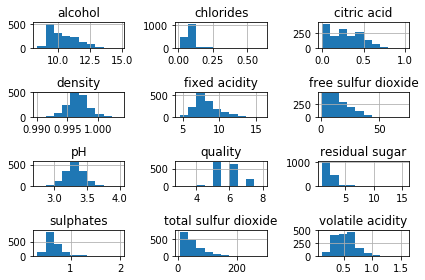

In [13]:
import matplotlib.pyplot as plt
df.hist()
plt.tight_layout()
plt.show()

## Density Plot

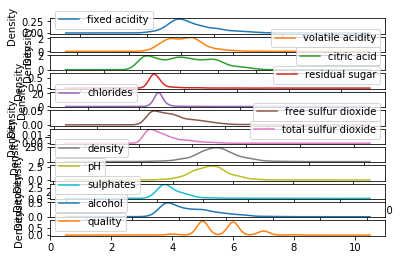

In [14]:
df.plot(kind='density',subplots=True,sharex=False)
plt.show()

## Box and Whisker Plot

fixed acidity              AxesSubplot(0.125,0.125;0.0545775x0.755)
volatile acidity        AxesSubplot(0.190493,0.125;0.0545775x0.755)
citric acid             AxesSubplot(0.255986,0.125;0.0545775x0.755)
residual sugar          AxesSubplot(0.321479,0.125;0.0545775x0.755)
chlorides               AxesSubplot(0.386972,0.125;0.0545775x0.755)
free sulfur dioxide     AxesSubplot(0.452465,0.125;0.0545775x0.755)
total sulfur dioxide    AxesSubplot(0.517958,0.125;0.0545775x0.755)
density                 AxesSubplot(0.583451,0.125;0.0545775x0.755)
pH                      AxesSubplot(0.648944,0.125;0.0545775x0.755)
sulphates               AxesSubplot(0.714437,0.125;0.0545775x0.755)
alcohol                  AxesSubplot(0.77993,0.125;0.0545775x0.755)
quality                 AxesSubplot(0.845423,0.125;0.0545775x0.755)
dtype: object

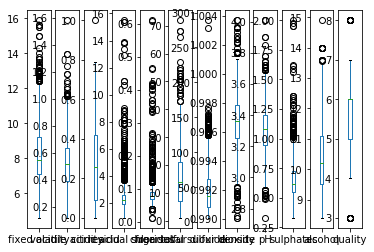

In [15]:
df.plot(kind='box',subplots=True,sharex=False,sharey=False)

## Correlation Matrix Plot
相関を行列で可視化

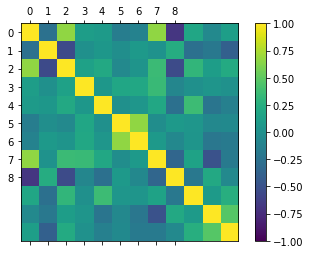

In [16]:
correlations = df.corr()
#display(correlations)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

## Scatter Matrix Plot

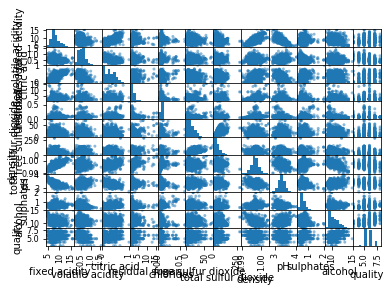

In [17]:
pandas.plotting.scatter_matrix(df)
plt.show()

# PCA(Principal Component Analysis)
主成分分析（しゅせいぶんぶんせき、英: principal component analysis; PCA）は、相関のある多数の変数から相関のない少数で全体のばらつきを最もよく表す主成分と呼ばれる変数を合成する多変量解析の一手法。データの次元を削減するために用いられる。
https://ja.wikipedia.org/wiki/%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90

## まだ、PCAについて詳しくは分からないが下記のサイトが理解の役に立った
https://nbviewer.jupyter.org/github/contaconta/PCA_lecture/blob/master/PCA.ipynb


## 初歩的なPCAの書き方

In [18]:
%matplotlib inline
import numpy as np
from sklearn.decomposition import PCA
np.set_printoptions(precision=3)
X = np.array([[-1,-1],
              [-2,-1],
              [-3,-2],
              [1,1],
              [2,1],
              [3,2]])
pca = PCA(n_components=2)
display(pca.fit(X))
print('寄与率')
print(pca.explained_variance_ratio_)
print('特異値')
print(pca.singular_values_)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

寄与率
[0.992 0.008]
特異値
[6.301 0.55 ]


## UCIのwine-qualityをPCAで可視化

### 3DのPCAで可視化

標準化なしの寄与率
[0.947 0.048 0.003]
標準化ありの寄与率
[0.305 0.226 0.155]


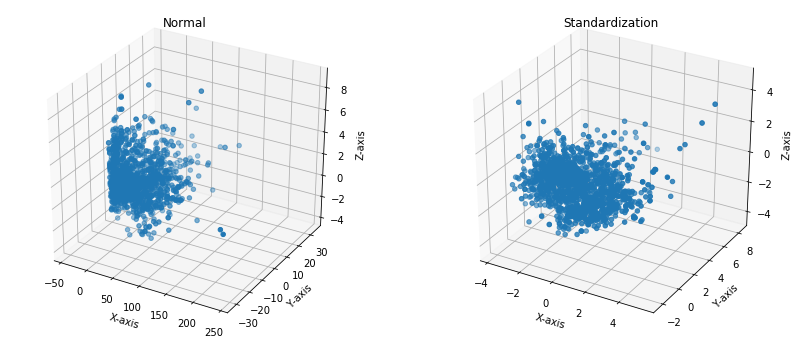

In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn import datasets
np.set_printoptions(precision=3)

np.random.seed(5)
fig = plt.figure(figsize=(14,6))

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
X = df.values[:, :8]

# 1番目
pca = decomposition.PCA(n_components=3).fit(X)
X = pca.transform(X)
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X[:, 0],
            X[:, 1],
            X[:, 2])
ax1.set_title('Normal')
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax1.set_zlabel("Z-axis")
print('標準化なしの寄与率')
print(pca.explained_variance_ratio_)

# 2番目
X = df.values[:, :8]

# 標準化
scaler = StandardScaler().fit(X)
scaledX = scaler.transform(X)

pca = decomposition.PCA(n_components=3).fit(scaledX)
scaledX = pca.transform(scaledX)

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(scaledX[:, 0],
            scaledX[:, 1],
            scaledX[:, 2])
ax2.set_title('Standardization')
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")
ax2.set_zlabel("Z-axis")
print('標準化ありの寄与率')
print(pca.explained_variance_ratio_)

plt.show()

### 2DのPCAで可視化

標準化なしの寄与率
[0.947 0.048]
標準化ありの寄与率
[0.305 0.226]


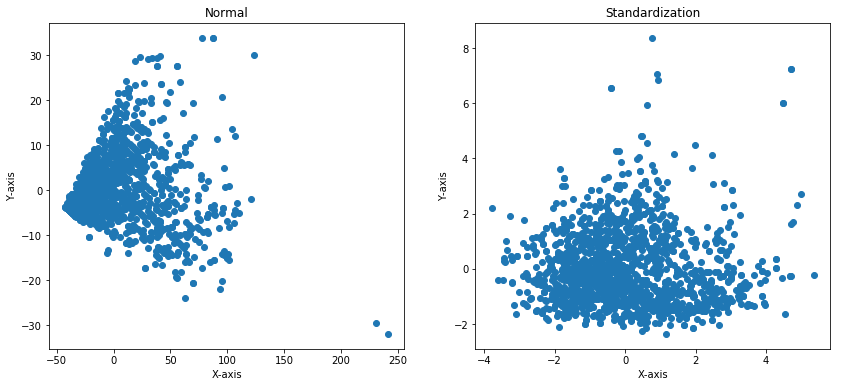

In [20]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn import datasets
np.set_printoptions(precision=3)

np.random.seed(5)
fig = plt.figure(figsize=(14,6))

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep=';')
X = df.values[:, :8]

# 1番目
pca = decomposition.PCA(n_components=2).fit(X)
X = pca.transform(X)
ax1 = fig.add_subplot(121)
ax1.scatter(X[:, 0],
            X[:, 1])
ax1.set_title('Normal')
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
print('標準化なしの寄与率')
print(pca.explained_variance_ratio_)

# 2番目
X = df.values[:, :8]

# 標準化
scaler = StandardScaler().fit(X)
scaledX = scaler.transform(X)

pca = decomposition.PCA(n_components=2).fit(scaledX)
scaledX = pca.transform(scaledX)

ax2 = fig.add_subplot(122)
ax2.scatter(scaledX[:, 0],
            scaledX[:, 1])
ax2.set_title('Standardization')
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")
print('標準化ありの寄与率')
print(pca.explained_variance_ratio_)

plt.show()

## sklearnのirisデータをPCAで可視化
### 3D-PCAで可視化

標準化なしの寄与率
[0.925 0.053 0.017]
標準化ありの寄与率
[0.73  0.229 0.037]


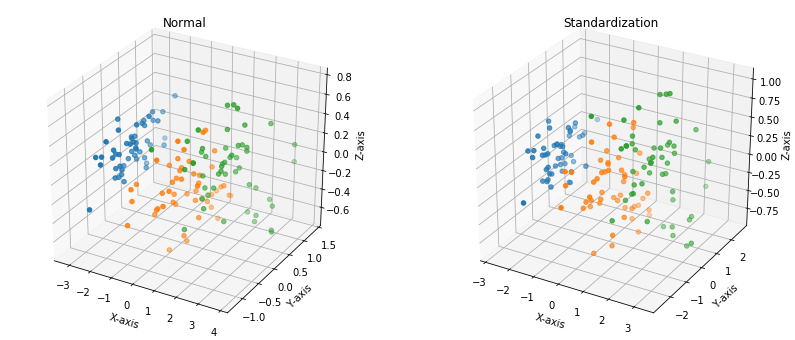

In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn import datasets
np.set_printoptions(precision=3)

np.random.seed(5)
fig = plt.figure(figsize=(14,6))

iris = datasets.load_iris()
X = iris.data
y = iris.target

# 1番目
pca = decomposition.PCA(n_components=3).fit(X)
X = pca.transform(X)
ax1 = fig.add_subplot(121, projection='3d')
for label in np.unique(y):
    ax1.scatter(X[y == label, 0],
                X[y == label, 1],
                X[y == label, 2])
ax1.set_title('Normal')
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax1.set_zlabel("Z-axis")
print('標準化なしの寄与率')
print(pca.explained_variance_ratio_)

# 2番目
X = iris.data
y = iris.target

# 標準化
scaler = StandardScaler().fit(X)
scaledX = scaler.transform(X)

pca = decomposition.PCA(n_components=3).fit(scaledX)
scaledX = pca.transform(scaledX)

ax2 = fig.add_subplot(122, projection='3d')
for label in np.unique(y):
    ax2.scatter(scaledX[y == label, 0],
                scaledX[y == label, 1],
                scaledX[y == label, 2])
ax2.set_title('Standardization')
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")
ax2.set_zlabel("Z-axis")
print('標準化ありの寄与率')
print(pca.explained_variance_ratio_)

plt.show()

### 2D-PCAで可視化

標準化なしの寄与率
[0.925 0.053]
標準化ありの寄与率
[0.73  0.229]


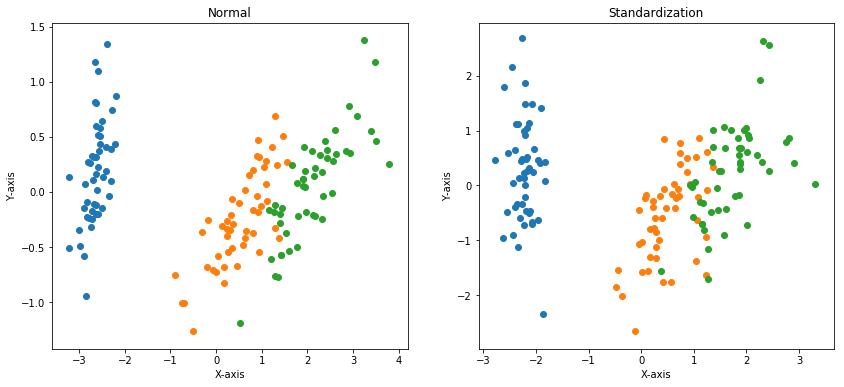

In [22]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn import datasets
np.set_printoptions(precision=3)

np.random.seed(5)
fig = pyplot.figure(figsize=(14,6))

iris = datasets.load_iris()
X = iris.data
y = iris.target

# 1番目
pca = decomposition.PCA(n_components=2).fit(X)
X = pca.transform(X)
ax1 = fig.add_subplot(121)
for label in np.unique(y):
    ax1.scatter(X[y == label, 0],
                X[y == label, 1])
ax1.set_title('Normal')
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
print('標準化なしの寄与率')
print(pca.explained_variance_ratio_)

# 2番目
X = iris.data
y = iris.target

# 標準化
scaler = StandardScaler().fit(X)
scaledX = scaler.transform(X)

pca = decomposition.PCA(n_components=2).fit(scaledX)
scaledX = pca.transform(scaledX)

ax2 = fig.add_subplot(122)
for label in np.unique(y):
    ax2.scatter(scaledX[y == label, 0],
                scaledX[y == label, 1])
ax2.set_title('Standardization')
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")
print('標準化ありの寄与率')
print(pca.explained_variance_ratio_)

pyplot.show()

### irisデータセットの場合は、あまり前処理が有効ではないと感じた（簡単すぎる可能性があるため）

## UCIのwineデータをPCAで可視化
### UCIのwineデータ = sklearnのwineデータ ということに全て終わった後に気付いた…
Abstract: Using chemical analysis determine the origin of wines<br>
※UCIにはwineデータとwinequalityデータがあって間違えてしまいがち...

### 3DのPCAで可視化

標準化なしの寄与率
[9.981e-01 1.736e-03 9.496e-05]
標準化ありの寄与率
[0.362 0.192 0.111]


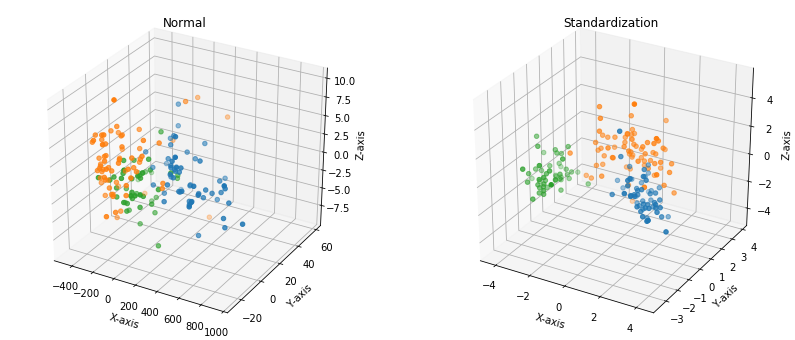

In [23]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn import datasets
np.set_printoptions(precision=3)

np.random.seed(5)
fig = plt.figure(figsize=(14,6))

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',sep=',',header=None)
# 行・列のlabel以外を取得
X = df.values[:,1:]
y = df.values[:,0]
# 1番目
pca = decomposition.PCA(n_components=3).fit(X)
X = pca.transform(X)
ax1 = fig.add_subplot(121, projection='3d')
for label in np.unique(y):
    ax1.scatter(X[y == label, 0],
                X[y == label, 1],
                X[y == label, 2])
ax1.set_title('Normal')
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax1.set_zlabel("Z-axis")
print('標準化なしの寄与率')
print(pca.explained_variance_ratio_)

# 2番目
X = df.values[:,1:]

# 標準化
scaler = StandardScaler().fit(X)
scaledX = scaler.transform(X)

pca = decomposition.PCA(n_components=3).fit(scaledX)
scaledX = pca.transform(scaledX)

ax2 = fig.add_subplot(122, projection='3d')
for label in np.unique(y):
    ax2.scatter(scaledX[y == label, 0],
                scaledX[y == label, 1],
                scaledX[y == label, 2])
ax2.set_title('Standardization')
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")
ax2.set_zlabel("Z-axis")
print('標準化ありの寄与率')
print(pca.explained_variance_ratio_)

plt.show()

### 2DのPCAで可視化

標準化なしの寄与率
[0.998 0.002]
標準化ありの寄与率
[0.362 0.192]


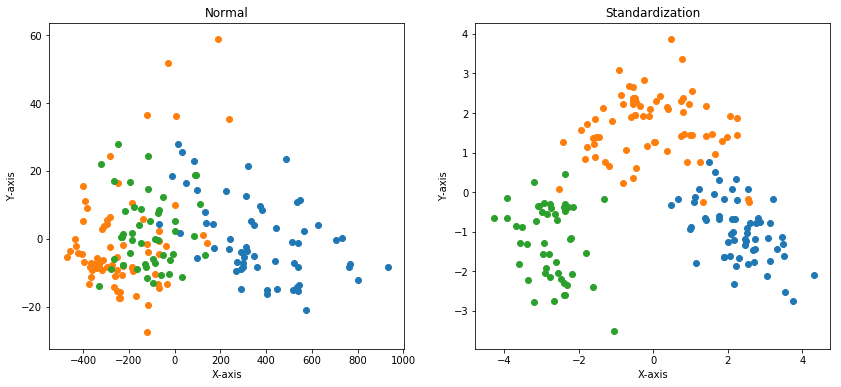

In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn import datasets
np.set_printoptions(precision=3)

np.random.seed(5)
fig = pyplot.figure(figsize=(14,6))

df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',sep=',',header=None)
# 行・列のlabel以外を取得
X = df.values[:,1:]
y = df.values[:,0]

# 1番目
pca = decomposition.PCA(n_components=2).fit(X)
X = pca.transform(X)
ax1 = fig.add_subplot(121)
for label in np.unique(y):
    ax1.scatter(X[y == label, 0],
                X[y == label, 1])
ax1.set_title('Normal')
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
print('標準化なしの寄与率')
print(pca.explained_variance_ratio_)

# 2番目
X = df.values[:,1:]

# 標準化
scaler = StandardScaler().fit(X)
scaledX = scaler.transform(X)

pca = decomposition.PCA(n_components=2).fit(scaledX)
scaledX = pca.transform(scaledX)

ax2 = fig.add_subplot(122)
for label in np.unique(y):
    ax2.scatter(scaledX[y == label, 0],
                scaledX[y == label, 1])
ax2.set_title('Standardization')
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")
print('標準化ありの寄与率')
print(pca.explained_variance_ratio_)

pyplot.show()

### 3D, 2Dの両方の場合において、標準化を入れてPCAを適用した方が、よりはっきりとクラスが分離された分布となっていることが分かる

## UCIのadultデータをPCAで可視化（numericalなデータのみ使用）
UCIのadultデータのAbstract: 
Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.
URL: https://archive.ics.uci.edu/ml/datasets/adult<br>


label: (['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
     'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'Your income is 50k$ ?'])

### 3DのPCAで可視化

標準化なしの寄与率
[9.951e-01 4.872e-03 1.449e-05]


c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


標準化ありの寄与率
[0.218 0.173 0.17 ]


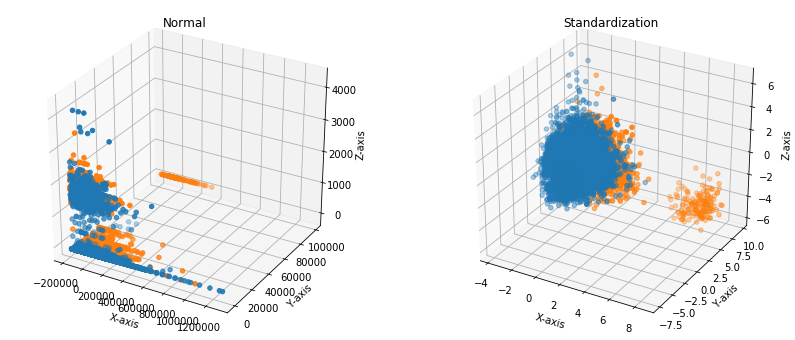

In [25]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn import datasets
np.set_printoptions(precision=3)

np.random.seed(5)
fig = plt.figure(figsize=(14,6))

df_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep=',', header=None)

X = df_data.values
y = X[:,-1] # <=50K or >50K
#'age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'のみを使用する
X = X[:,[0,2,4,10,11,12]]


# 1番目
pca = decomposition.PCA(n_components=3).fit(X)
X = pca.transform(X)
ax1 = fig.add_subplot(121, projection='3d')
for label in np.unique(y):
    ax1.scatter(X[y == label, 0],
                X[y == label, 1],
                X[y == label, 2])
ax1.set_title('Normal')
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax1.set_zlabel("Z-axis")
print('標準化なしの寄与率')
print(pca.explained_variance_ratio_)

# 2番目
X = df_data.values
# numericalなXのみでPCAを行う
#'age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'のみを使用する
X = X[:,[0,2,4,10,11,12]]

# 標準化
scaler = StandardScaler().fit(X)
scaledX = scaler.transform(X)

pca = decomposition.PCA(n_components=3).fit(scaledX)
scaledX = pca.transform(scaledX)

ax2 = fig.add_subplot(122, projection='3d')
for label in np.unique(y):
    ax2.scatter(scaledX[y == label, 0],
                scaledX[y == label, 1],
                scaledX[y == label, 2])
ax2.set_title('Standardization')
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")
ax2.set_zlabel("Z-axis")
print('標準化ありの寄与率')
print(pca.explained_variance_ratio_)

plt.show()

### 2DのPCAで可視化

標準化なしの寄与率
[0.995 0.005]


c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
c:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


標準化ありの寄与率
[0.218 0.173]


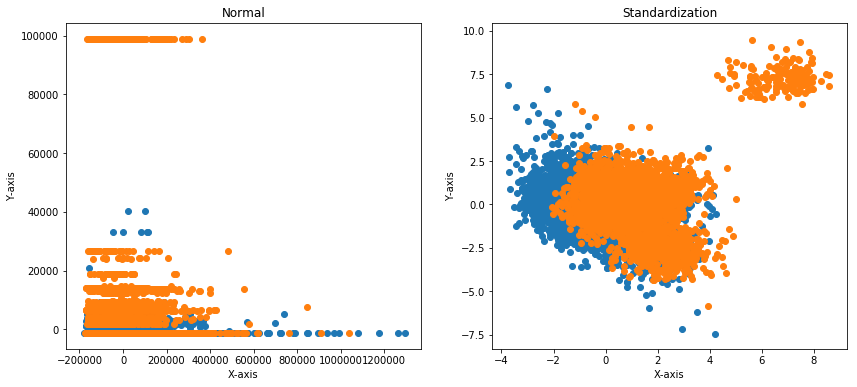

In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn import datasets
np.set_printoptions(precision=3)

np.random.seed(5)
fig = pyplot.figure(figsize=(14,6))

X = df_data.values
y = X[:,-1] # <=50K or >50K
#'age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'のみを使用する
X = X[:,[0,2,4,10,11,12]]

# 1番目
pca = decomposition.PCA(n_components=2).fit(X)
X = pca.transform(X)
ax1 = fig.add_subplot(121)
for label in np.unique(y):
    ax1.scatter(X[y == label, 0],
                X[y == label, 1])
ax1.set_title('Normal')
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
print('標準化なしの寄与率')
print(pca.explained_variance_ratio_)

# 2番目
X = df_data.values
# numericalなXのみでPCAを行う
#'age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'のみを使用する
X = X[:,[0,2,4,10,11,12]]

# 標準化
scaler = StandardScaler().fit(X)
scaledX = scaler.transform(X)

pca = decomposition.PCA(n_components=2).fit(scaledX)
scaledX = pca.transform(scaledX)

ax2 = fig.add_subplot(122)
for label in np.unique(y):
    ax2.scatter(scaledX[y == label, 0],
                scaledX[y == label, 1])
ax2.set_title('Standardization')
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")
print('標準化ありの寄与率')
print(pca.explained_variance_ratio_)

pyplot.show()

### 前処理なしの方が寄与率は高いが、データ分布は極端で酷い。<br>前処理後の方が1つの軸に対する寄与率は下がっているがデータ分布が中心に寄り、良いデータ分布になっていると感じた

## sklearnのbostonデータセットをPCAで可視化
### 米国ボストン市郊外における地域別の住宅価格のデータセットのため、回帰問題に使われるデータセット<br>そのため、グラフ上の色はバラバラです。

### 3DのPCAで可視化

標準化なしの寄与率
[0.806 0.163 0.021]
標準化ありの寄与率
[0.471 0.11  0.096]


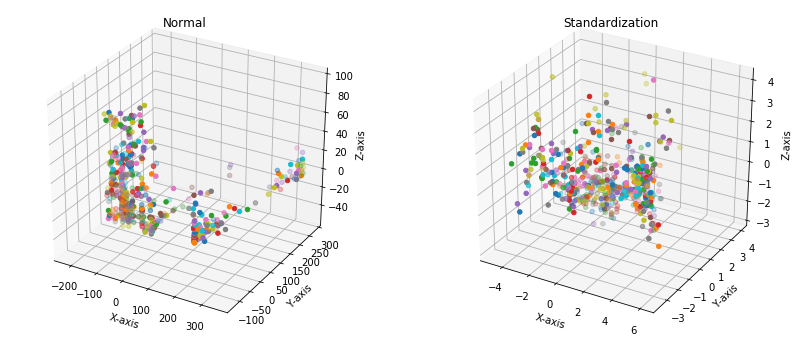

In [27]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn import datasets
np.set_printoptions(precision=3)

np.random.seed(5)
fig = plt.figure(figsize=(14,6))

boston = datasets.load_boston()
X = boston.data
y = boston.target

# 1番目
pca = decomposition.PCA(n_components=3).fit(X)
X = pca.transform(X)
ax1 = fig.add_subplot(121, projection='3d')
for label in np.unique(y):
    ax1.scatter(X[y == label, 0],
                X[y == label, 1],
                X[y == label, 2])
ax1.set_title('Normal')
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax1.set_zlabel("Z-axis")
print('標準化なしの寄与率')
print(pca.explained_variance_ratio_)

# 2番目
boston = datasets.load_boston()
X = boston.data
y = boston.target

# 標準化
scaler = StandardScaler().fit(X)
scaledX = scaler.transform(X)

pca = decomposition.PCA(n_components=3).fit(scaledX)
scaledX = pca.transform(scaledX)

ax2 = fig.add_subplot(122, projection='3d')
for label in np.unique(y):
    ax2.scatter(scaledX[y == label, 0],
                scaledX[y == label, 1],
                scaledX[y == label, 2])
ax2.set_title('Standardization')
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")
ax2.set_zlabel("Z-axis")
print('標準化ありの寄与率')
print(pca.explained_variance_ratio_)

plt.show()

### 2DのPCAで可視化

標準化なしの寄与率
[0.806 0.163]
標準化ありの寄与率
[0.471 0.11 ]


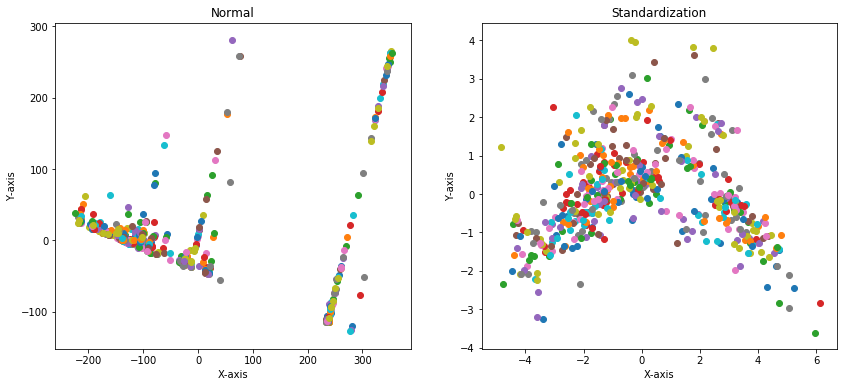

In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn import datasets
np.set_printoptions(precision=3)

np.random.seed(5)
fig = pyplot.figure(figsize=(14,6))

boston = datasets.load_boston()
X = boston.data
y = boston.target

# 1番目
pca = decomposition.PCA(n_components=2).fit(X)
X = pca.transform(X)
ax1 = fig.add_subplot(121)
for label in np.unique(y):
    ax1.scatter(X[y == label, 0],
                X[y == label, 1])
ax1.set_title('Normal')
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
print('標準化なしの寄与率')
print(pca.explained_variance_ratio_)

# 2番目
boston = datasets.load_boston()
X = boston.data
y = boston.target

# 標準化
scaler = StandardScaler().fit(X)
scaledX = scaler.transform(X)

pca = decomposition.PCA(n_components=2).fit(scaledX)
scaledX = pca.transform(scaledX)

ax2 = fig.add_subplot(122)
for label in np.unique(y):
    ax2.scatter(scaledX[y == label, 0],
                scaledX[y == label, 1])
ax2.set_title('Standardization')
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")
print('標準化ありの寄与率')
print(pca.explained_variance_ratio_)

pyplot.show()

### 前処理（標準化）を入れた方が、元データに影響を受けるスケール問題が無くなり、データ分布の偏りも小さくなった<br>

## sklearnのwineデータセットをPCAで可視化

### 3DのPCAで可視化

標準化なしの寄与率
[9.981e-01 1.736e-03 9.496e-05]
標準化ありの寄与率
[0.362 0.192 0.111]


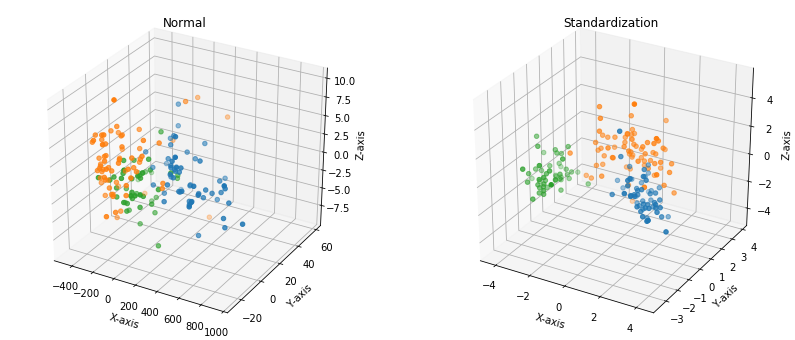

In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn import datasets
np.set_printoptions(precision=3)

np.random.seed(5)
fig = plt.figure(figsize=(14,6))

wine = datasets.load_wine()
X = wine.data
y = wine.target

# 1番目
pca = decomposition.PCA(n_components=3).fit(X)
X = pca.transform(X)
ax1 = fig.add_subplot(121, projection='3d')
for label in np.unique(y):
    ax1.scatter(X[y == label, 0],
                X[y == label, 1],
                X[y == label, 2])
ax1.set_title('Normal')
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax1.set_zlabel("Z-axis")
print('標準化なしの寄与率')
print(pca.explained_variance_ratio_)

# 2番目
wine = datasets.load_wine()
X = wine.data
y = wine.target

# 標準化
scaler = StandardScaler().fit(X)
scaledX = scaler.transform(X)

pca = decomposition.PCA(n_components=3).fit(scaledX)
scaledX = pca.transform(scaledX)

ax2 = fig.add_subplot(122, projection='3d')
for label in np.unique(y):
    ax2.scatter(scaledX[y == label, 0],
                scaledX[y == label, 1],
                scaledX[y == label, 2])
ax2.set_title('Standardization')
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")
ax2.set_zlabel("Z-axis")
print('標準化ありの寄与率')
print(pca.explained_variance_ratio_)

plt.show()

### 2DのPCAで可視化

標準化なしの寄与率
[0.998 0.002]
標準化ありの寄与率
[0.362 0.192]


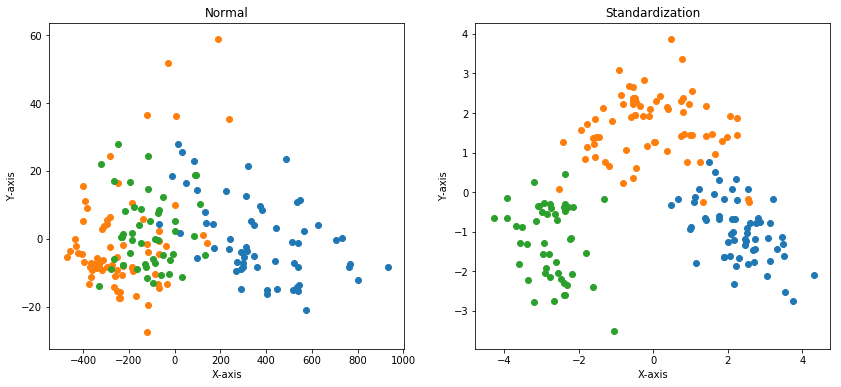

In [30]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn import datasets
np.set_printoptions(precision=3)

np.random.seed(5)
fig = pyplot.figure(figsize=(14,6))

wine = datasets.load_wine()
X = wine.data
y = wine.target

# 1番目
pca = decomposition.PCA(n_components=2).fit(X)
X = pca.transform(X)
ax1 = fig.add_subplot(121)
for label in np.unique(y):
    ax1.scatter(X[y == label, 0],
                X[y == label, 1])
ax1.set_title('Normal')
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
print('標準化なしの寄与率')
print(np.array(pca.explained_variance_ratio_))

# 2番目
wine = datasets.load_wine()
X = wine.data
y = wine.target

# 標準化
scaler = StandardScaler().fit(X)
scaledX = scaler.transform(X)

pca = decomposition.PCA(n_components=2).fit(scaledX)
scaledX = pca.transform(scaledX)

ax2 = fig.add_subplot(122)
for label in np.unique(y):
    ax2.scatter(scaledX[y == label, 0],
                scaledX[y == label, 1])
ax2.set_title('Standardization')
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")
print('標準化ありの寄与率')
print(np.array(pca.explained_variance_ratio_))

pyplot.show()

### 3D, 2Dの両方の場合において、標準化を入れてPCAを適用した方が、よりはっきりとクラスが分離された分布となっていることが分かる（UCIレポジトリでも同じことをやったので、これで２度目）